<h1>Cardiovasculer Disease Prediction Machine Learning Project </h1>
<h2>Predicting  Cardiovascular Disease Using a cutting-edge Deep Learning Technique </h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from scipy.stats import chi2_contingency
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.tail(20)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69980,69980,99971,17727,2,167,69.0,110,80,1,1,0,1,0,0
69981,69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1
69982,69982,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1
69983,69983,99974,19652,1,165,72.0,120,80,1,1,0,0,1,0
69984,69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1
69985,69985,99977,18194,1,156,102.0,130,80,1,1,0,1,0,1
69986,69986,99978,18198,2,180,78.0,120,80,1,1,0,0,1,0
69987,69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0
69988,69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69989,69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,1


<h1>Data Information, Cleaning & Visualization</h1>

Age : Age of participant (integer)

Gender : Gender of participant (male/female).

Height : Height measured in centimeters (integer)

Weight : Weight measured in kilograms (integer)

Ap_hi : Systolic blood pressure reading taken from patient (integer)

Ap_lo : Diastolic blood pressure reading taken from patient (integer)

Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units (integer). Each unit denoting increase/decrease by 20 mg/dL respectively.

Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units (integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.

Smoke : Whether person smokes or not(binary; 0=No , 1=Yes).

Alco : Whether person drinks alcohol or not(binary; 0=No ,1=Yes).

Active : whether person physically active or not( Binary ; 0=No,1=Yes).

Cardio : whether person suffers from cardiovascular diseases or not(Binary; 0=No , 1=Yes).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [5]:
df.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
df.size

980000

In [7]:
df.shape

(70000, 14)

In [8]:
df.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
df.drop(['index', 'id'], axis = 1, inplace = True)
df['age']=(df['age']/365).astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df.nunique()

age             28
gender           2
height         109
weight         287
ap_hi          153
ap_lo          157
cholesterol      3
gluc             3
smoke            2
alco             2
active           2
cardio           2
dtype: int64

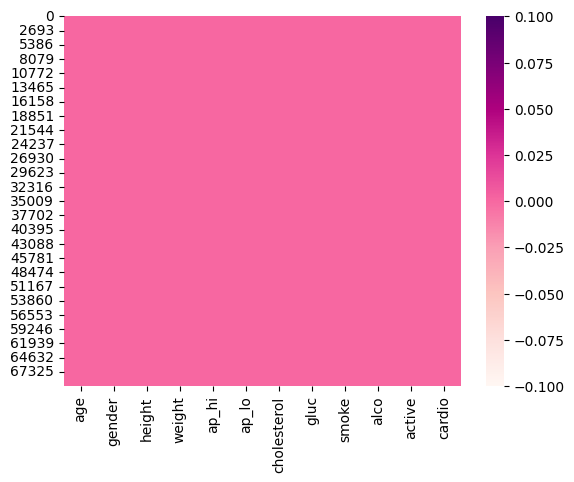

In [13]:
sns.heatmap(df.isnull(), cmap="RdPu" );

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [15]:
df_corr = df.corr()
df_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


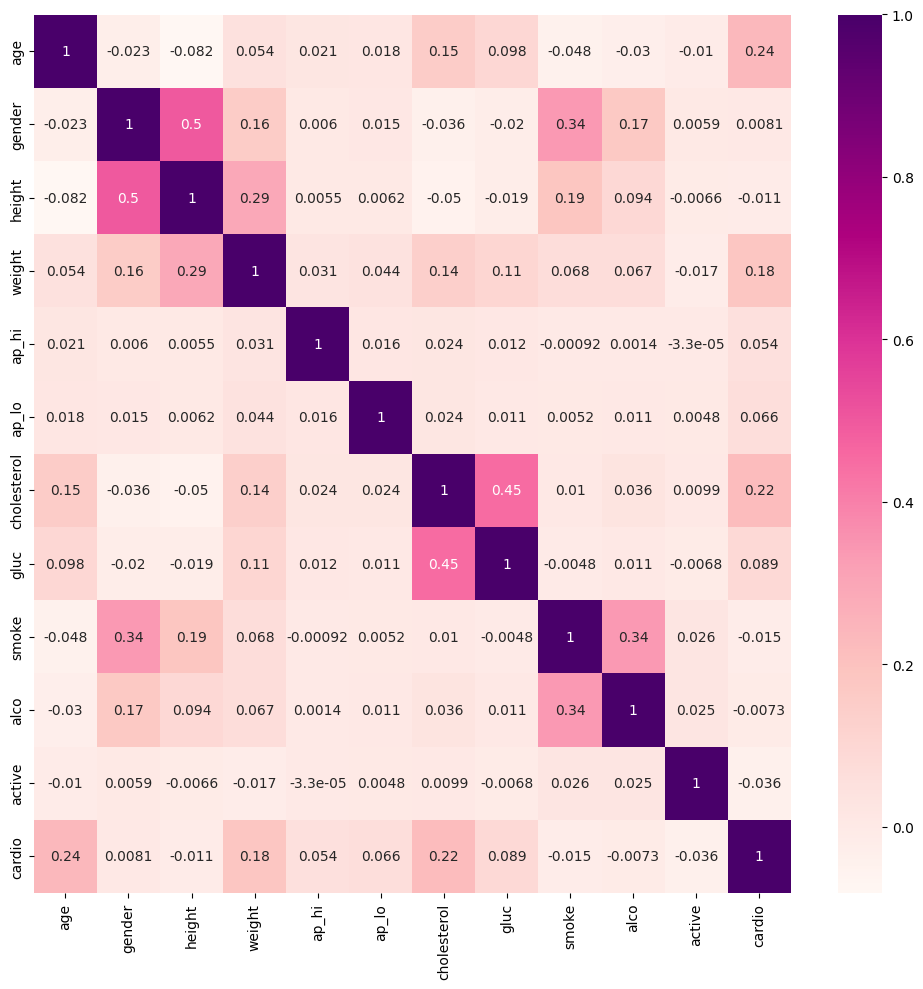

In [16]:
plt.figure(figsize=(10, 10))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='RdPu')
plt.tight_layout()

In [17]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

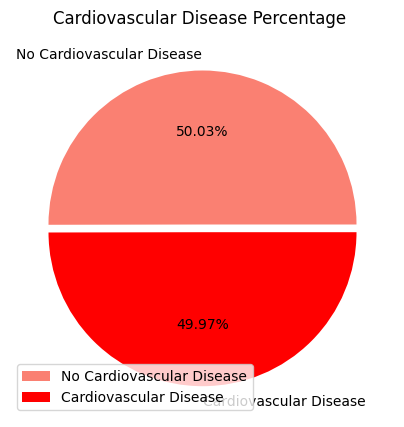

In [19]:
plt.figure(figsize = (5, 5))
plt.title('Cardiovascular Disease Percentage ')
plt.pie(df['cardio'].value_counts(), labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], explode = (0.0, 0.05), colors = ['salmon', 'red'],autopct = '%1.2f%%', shadow = False)
plt.legend(loc = 'best');

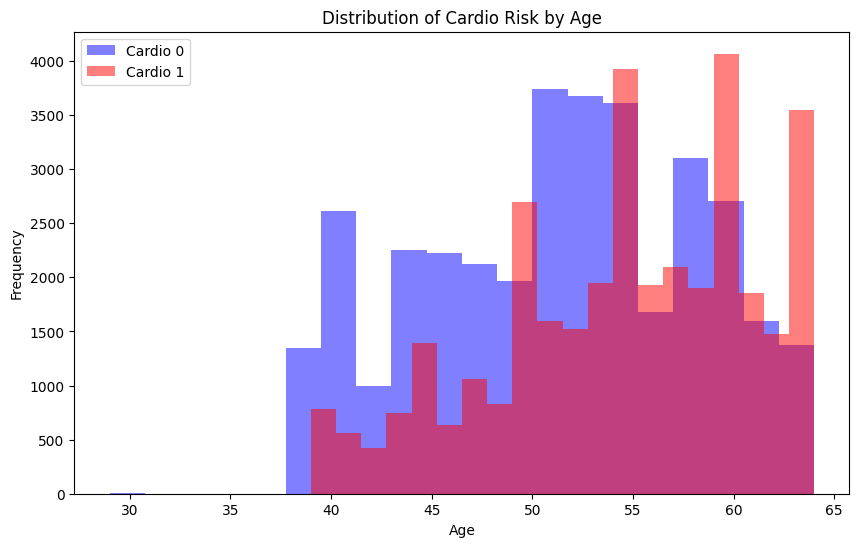

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['cardio'] == 0]['age'], bins=20, color='blue', alpha=0.5, label='Cardio 0')
plt.hist(df[df['cardio'] == 1]['age'], bins=20, color='red', alpha=0.5, label='Cardio 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Cardio Risk by Age')
plt.legend()
plt.show()

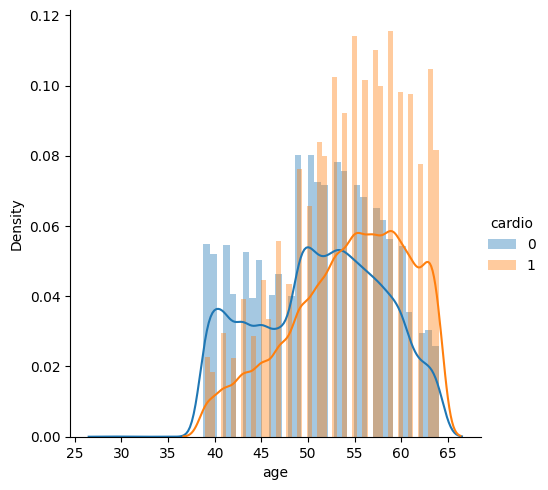

In [21]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.distplot, "age").add_legend()

In [22]:
df['gender'].replace({1: 'Male', 2: 'female'}, inplace=True)
df['cardio'].replace({0:'No Cardio', 1:'With Cardio'}, inplace=True)

In [23]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
Male      45530
female    24470
Name: count, dtype: int64

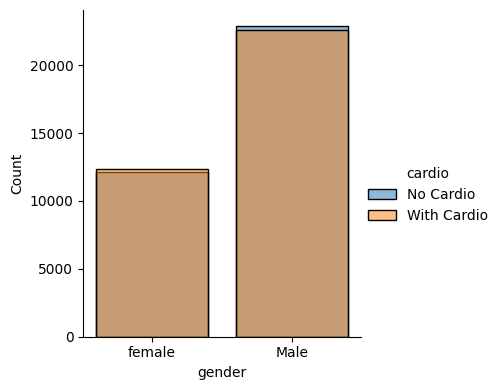

In [24]:
sea = sns.FacetGrid(data=df, hue="cardio", height=4)
sea.map(sns.histplot, "gender", shrink=0.8, alpha=0.5)
sea.add_legend()

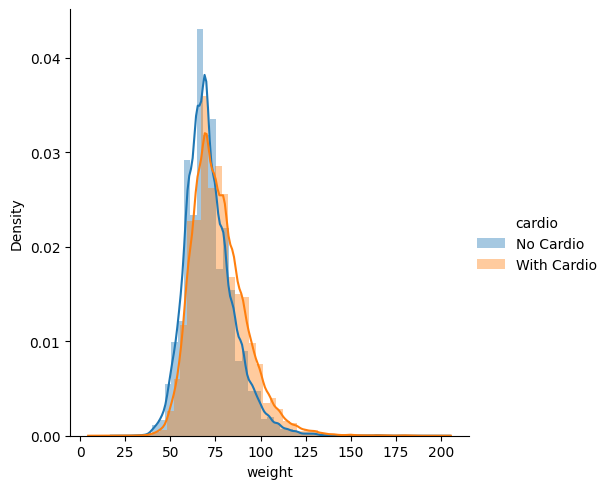

In [25]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.distplot, "weight")
sea.add_legend()

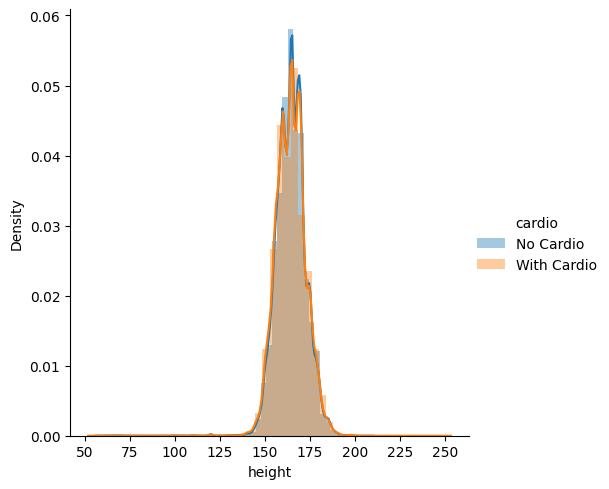

In [26]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.distplot, "height")
sea.add_legend()

In [27]:
df['cholesterol_transformed'] = df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'})

cholesterol_counts2 = df['cholesterol_transformed'].value_counts()
print(cholesterol_counts2)

cholesterol_transformed
normal               52385
above normal          9549
well above normal     8066
Name: count, dtype: int64


In [28]:
unique_cholesterol_values = df['cholesterol'].unique()
print(unique_cholesterol_values)

[1 3 2]


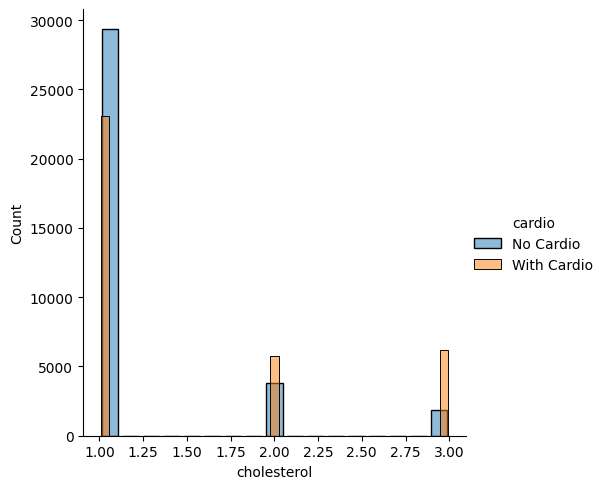

In [29]:
sea = sns.FacetGrid(data=df, hue="cardio", height=5)
sea.map(sns.histplot, "cholesterol", shrink=0.8, alpha=0.5)
sea.add_legend()

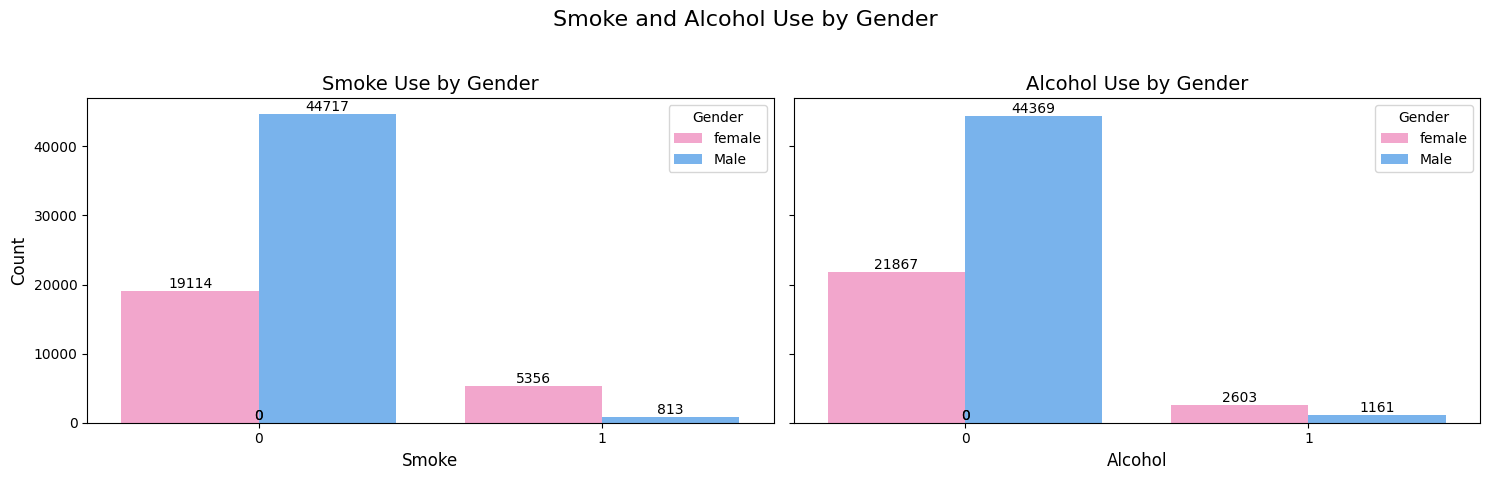

In [30]:
colors = ['#ff99cc', '#66b3ff']

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

fig.suptitle('Smoke and Alcohol Use by Gender', fontsize=16)

sns.countplot(ax=axes[0], x=df.smoke, hue=df.gender, palette=colors)
axes[0].set_title("Smoke Use by Gender", fontsize=14)
axes[0].set_xlabel("Smoke", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title="Gender")

sns.countplot(ax=axes[1], x=df.alco, hue=df.gender, palette=colors)
axes[1].set_title("Alcohol Use by Gender", fontsize=14)
axes[1].set_xlabel("Alcohol", fontsize=12)
axes[1].set_ylabel("")
axes[1].legend(title="Gender")

for ax in axes:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [31]:
df['gluc']=df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

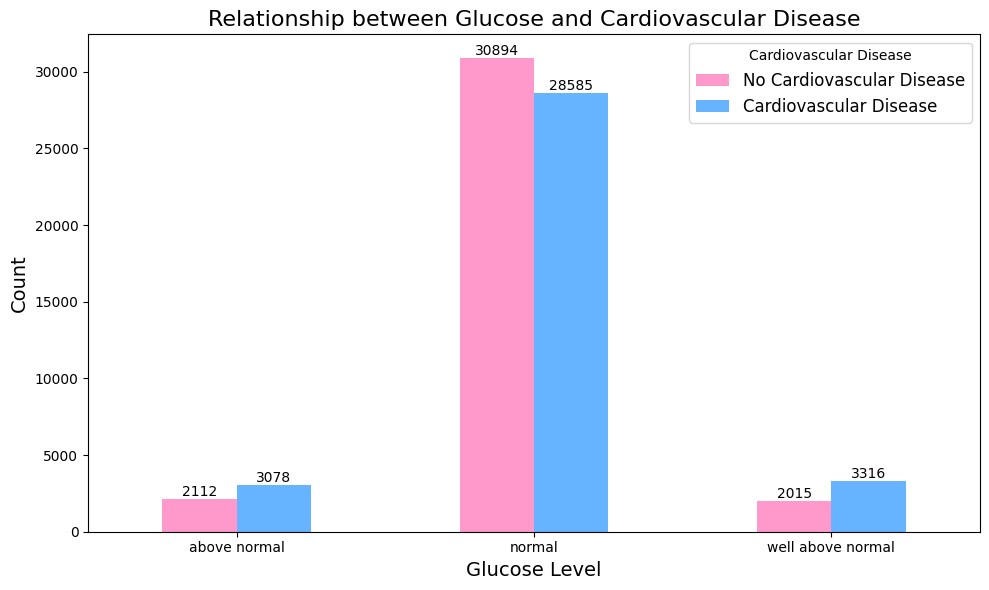

In [32]:
colors = ['#ff99cc', '#66b3ff']

cross_tab = pd.crosstab(df['gluc'], df['cardio'])

ax = cross_tab.plot(kind='bar', color=colors, figsize=(10, 6))

plt.title('Relationship between Glucose and Cardiovascular Disease', fontsize=16)
plt.xlabel('Glucose Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Cardiovascular Disease', labels=['No Cardiovascular Disease', 'Cardiovascular Disease'], fontsize=12)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [33]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

print(df[['weight', 'height', 'bmi']].head())

   weight  height        bmi
0    62.0     168  21.967120
1    85.0     156  34.927679
2    64.0     165  23.507805
3    82.0     169  28.710479
4    56.0     156  23.011177


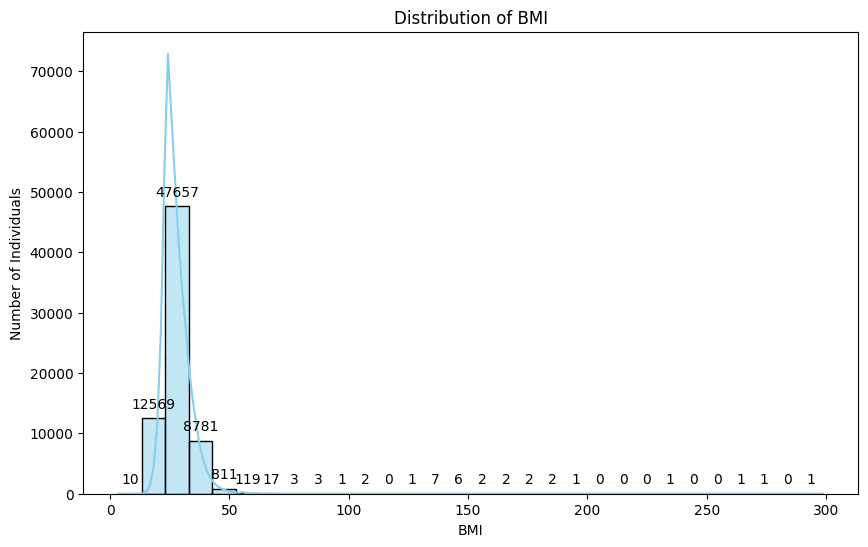

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of Individuals')

plt.show()

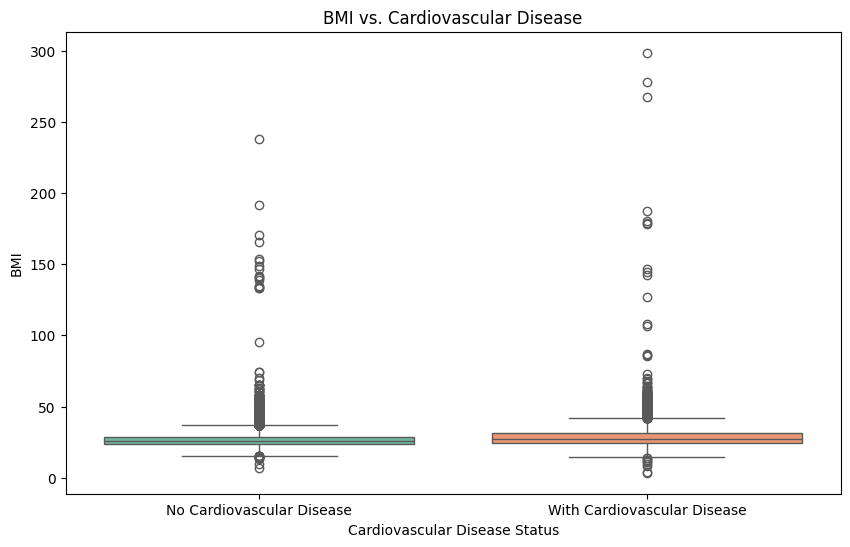

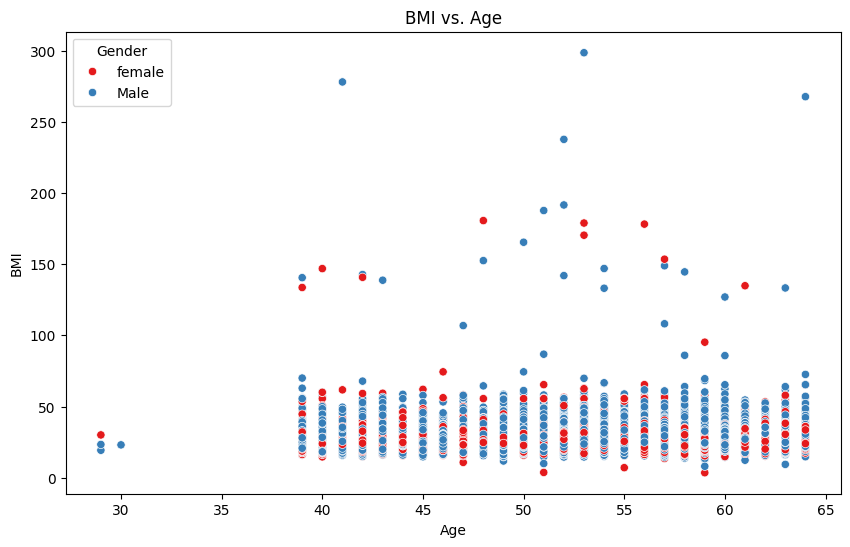

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=df, palette='Set2')
plt.title('BMI vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Cardiovascular Disease', 'With Cardiovascular Disease'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df, hue='gender', palette='Set1')
plt.title('BMI vs. Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.show()

T-statistic: nan
P-value: nan
There is no significant difference in BMI between individuals with and without cardiovascular disease.


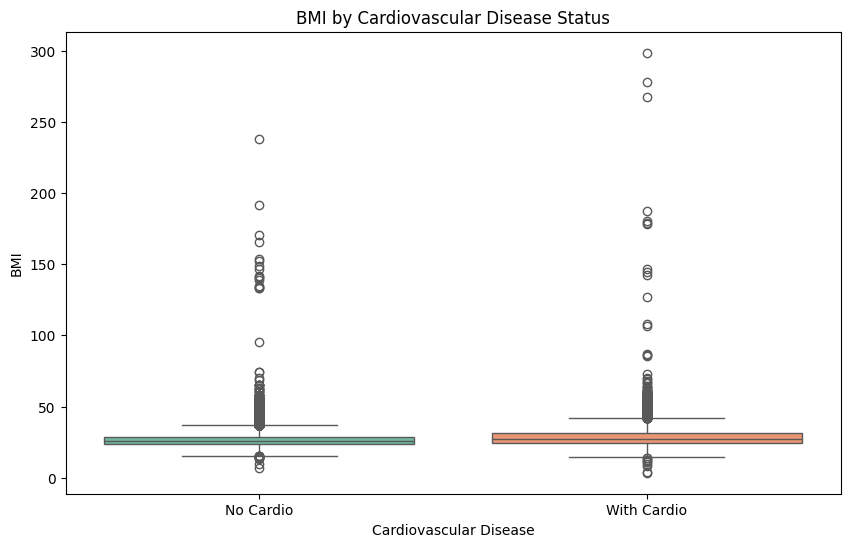

In [36]:
from scipy.stats import ttest_ind

bmi_cardio_0 = df[df['cardio'] == 0]['bmi']
bmi_cardio_1 = df[df['cardio'] == 1]['bmi']

t_stat, p_value = ttest_ind(bmi_cardio_0, bmi_cardio_1)
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in BMI between individuals with and without cardiovascular disease.")
else:
    print("There is no significant difference in BMI between individuals with and without cardiovascular disease.")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=df, palette='Set2')
plt.title('BMI by Cardiovascular Disease Status')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Cardio', 'With Cardio'])
plt.show()

In [37]:
df['bp_ratio'] = df['ap_hi'] / df['ap_lo']

print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol    gluc  smoke  \
0   50  female     168    62.0    110     80            1  normal      0   
1   55    Male     156    85.0    140     90            3  normal      0   
2   51    Male     165    64.0    130     70            3  normal      0   
3   48  female     169    82.0    150    100            1  normal      0   
4   47    Male     156    56.0    100     60            1  normal      0   

   alco  active       cardio cholesterol_transformed        bmi  bp_ratio  
0     0       1    No Cardio                  normal  21.967120  1.375000  
1     0       1  With Cardio       well above normal  34.927679  1.555556  
2     0       0  With Cardio       well above normal  23.507805  1.857143  
3     0       1  With Cardio                  normal  28.710479  1.500000  
4     0       0    No Cardio                  normal  23.011177  1.666667  


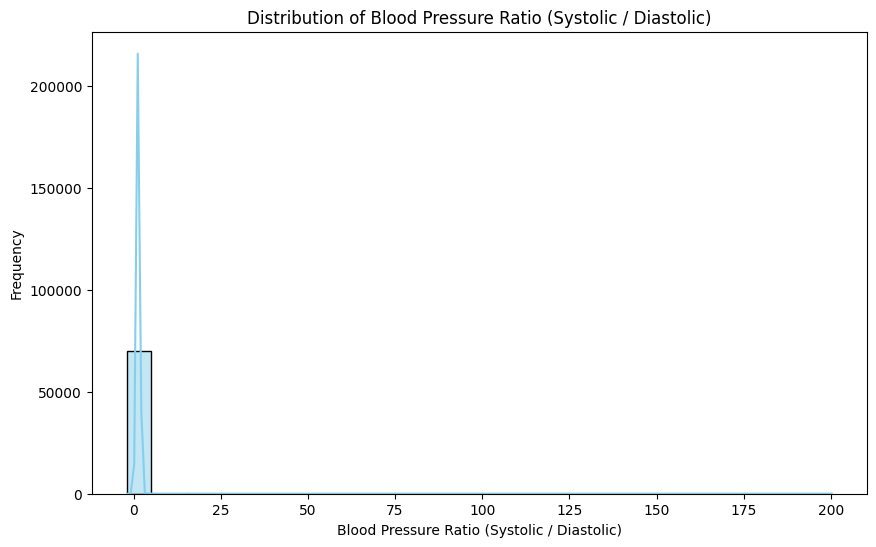

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bp_ratio'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Blood Pressure Ratio (Systolic / Diastolic)')
plt.xlabel('Blood Pressure Ratio (Systolic / Diastolic)')
plt.ylabel('Frequency')
plt.show()

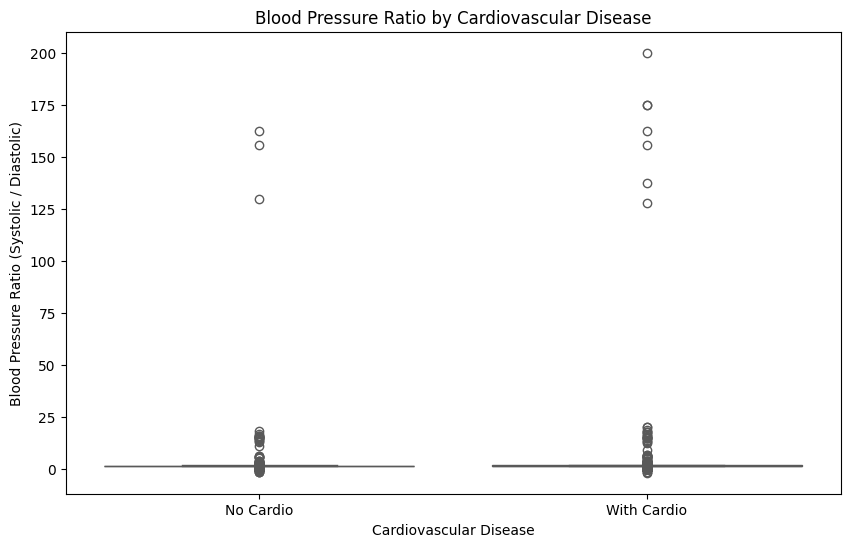

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bp_ratio', data=df, palette='Set2')
plt.title('Blood Pressure Ratio by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Blood Pressure Ratio (Systolic / Diastolic)')
plt.xticks([0, 1], ['No Cardio', 'With Cardio'])
plt.show()

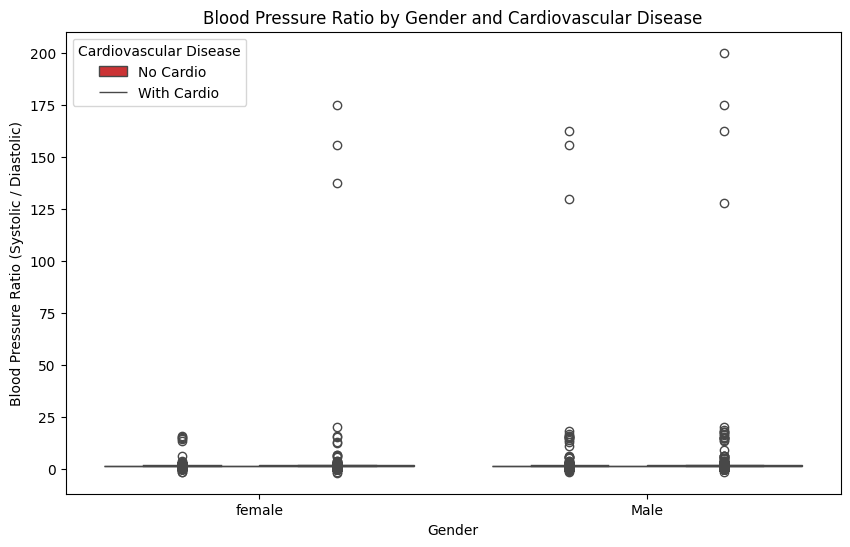

In [40]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='gender', y='bp_ratio', data=df, hue='cardio', palette='Set1')

plt.title('Blood Pressure Ratio by Gender and Cardiovascular Disease')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure Ratio (Systolic / Diastolic)')

plt.legend(title='Cardiovascular Disease', labels=['No Cardio', 'With Cardio'])

plt.show()

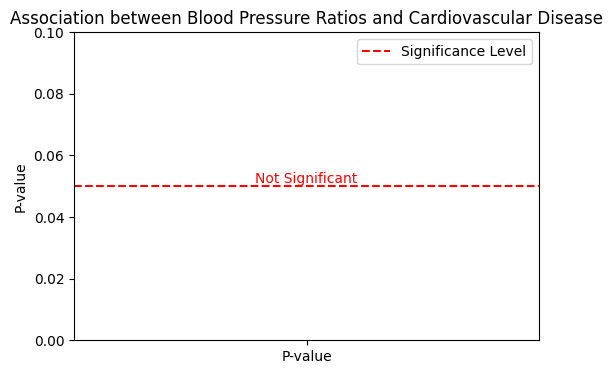

In [41]:
import matplotlib.pyplot as plt

alpha = 0.05

plt.figure(figsize=(6, 4))
plt.bar(['P-value'], [p_value], color='skyblue', alpha=0.7)

plt.axhline(y=alpha, color='red', linestyle='--', label='Significance Level')

plt.title('Association between Blood Pressure Ratios and Cardiovascular Disease')
plt.ylabel('P-value')
plt.ylim(0, 0.1)
plt.legend()

plt.text(0, p_value, f'p = {p_value:.4f}', ha='center', va='bottom')

if p_value < alpha:
    plt.text(0, alpha, 'Significant', ha='center', va='bottom', color='green')
else:
    plt.text(0, alpha, 'Not Significant', ha='center', va='bottom', color='red')

plt.show()

In [42]:
def classify_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 'Elevated'
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Hypertension Stage 1'
    elif ap_hi >= 140 or ap_lo >= 90:
        return 'Hypertension Stage 2'
    else:
        return 'Unknown'

df['blood_pressure_category'] = df.apply(lambda row: classify_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)

blood_pressure_distribution = df.groupby(['blood_pressure_category', 'cardio']).size().unstack(fill_value=0)
print(blood_pressure_distribution)

cardio                   No Cardio  With Cardio
blood_pressure_category                        
Elevated                      2113         1012
Hypertension Stage 1         22011        17923
Hypertension Stage 2          3421        13912
Normal                        7476         2132


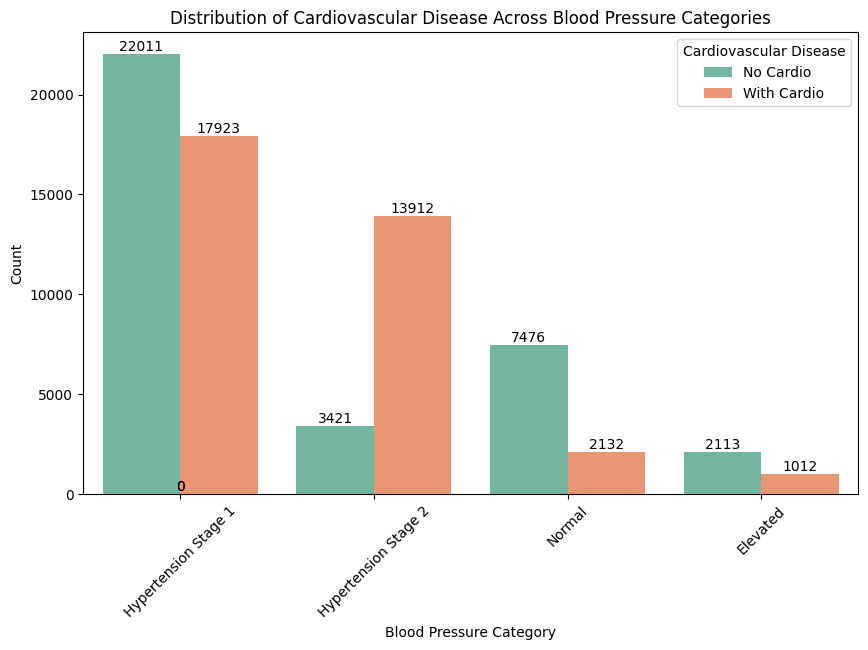

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='blood_pressure_category', hue='cardio', palette='Set2')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.title('Distribution of Cardiovascular Disease Across Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No Cardio', 'With Cardio'])
plt.show()

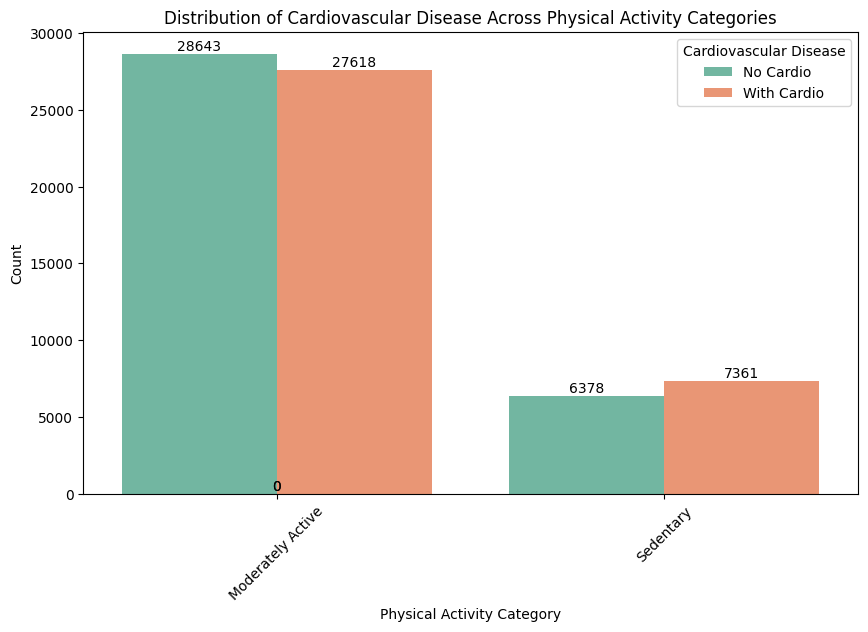

In [44]:
def categorize_activity(activity):
    if activity == 0:
        return 'Sedentary'
    elif activity == 1:
        return 'Moderately Active'
    elif activity == 2:
        return 'Highly Active'
    else:
        return 'Unknown'

df['activity_category'] = df['active'].apply(categorize_activity)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='activity_category', hue='cardio', palette='Set2')
plt.title('Distribution of Cardiovascular Disease Across Physical Activity Categories')
plt.xlabel('Physical Activity Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No Cardio', 'With Cardio'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

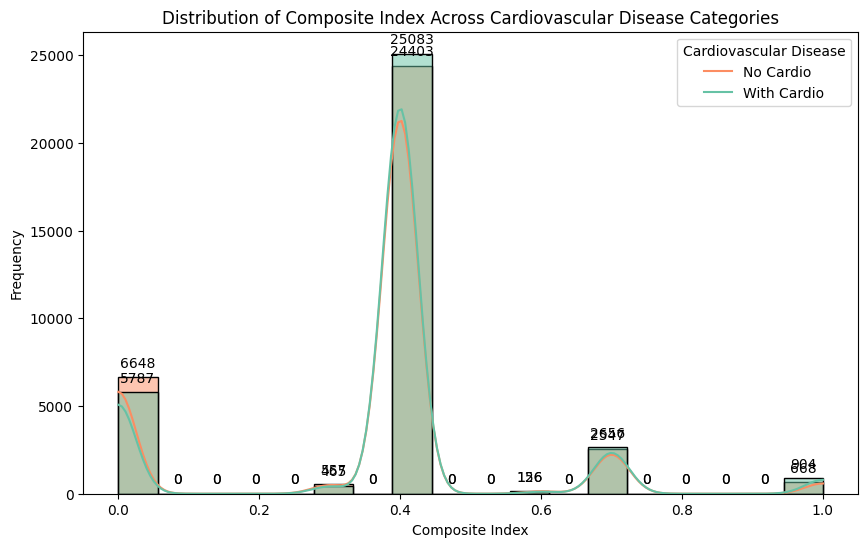

In [ ]:
weights = {
    'smoke': 0.3,
    'alco': 0.3,
    'active': 0.4
}

df['smoke_normalized'] = df['smoke'] / df['smoke'].max()
df['alco_normalized'] = df['alco'] / df['alco'].max()
df['active_normalized'] = df['active'] / df['active'].max()

df['composite_index'] = (
    weights['smoke'] * df['smoke_normalized'] +
    weights['alco'] * df['alco_normalized'] +
    weights['active'] * df['active_normalized']
)

df['composite_index'] = df['composite_index'].round(2)

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='composite_index', hue='cardio', palette='Set2', kde=True)
plt.title('Distribution of Composite Index Across Cardiovascular Disease Categories')
plt.xlabel('Composite Index')
plt.ylabel('Frequency')
plt.legend(title='Cardiovascular Disease', labels=['No Cardio', 'With Cardio'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

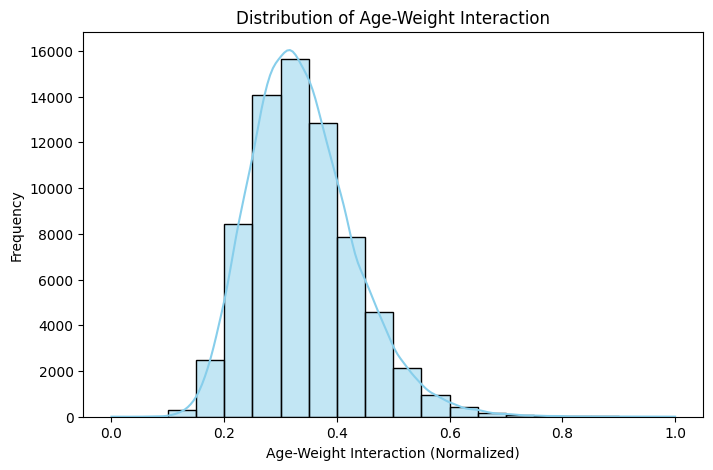

In [45]:
df['age_weight_interaction'] = df['age'] * df['weight']

df['age_weight_interaction_normalized'] = (df['age_weight_interaction'] - df['age_weight_interaction'].min()) / (df['age_weight_interaction'].max() - df['age_weight_interaction'].min())

plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df['age_weight_interaction_normalized'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age-Weight Interaction')
plt.xlabel('Age-Weight Interaction (Normalized)')
plt.ylabel('Frequency')
plt.show()

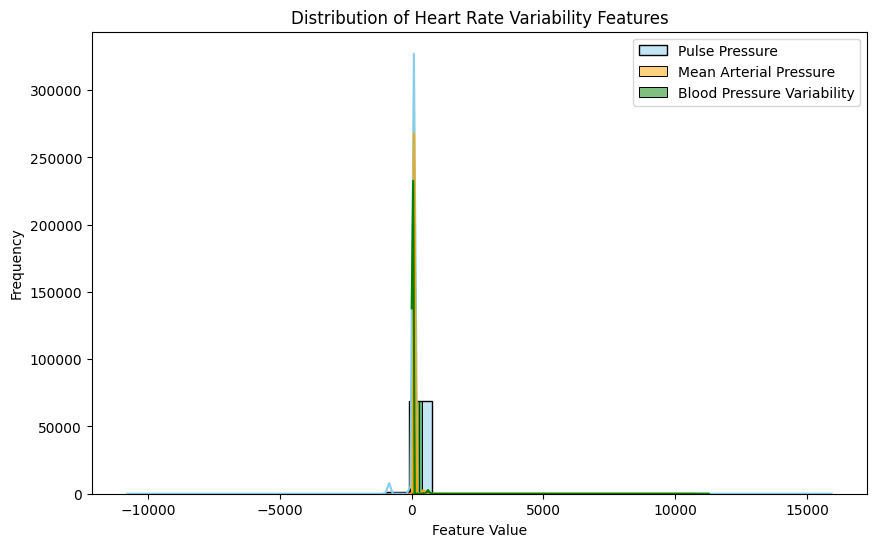

In [46]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

df['mean_arterial_pressure'] = (df['ap_lo'] + 2 * df['ap_hi']) / 3

df['blood_pressure_variability'] = df[['ap_hi', 'ap_lo']].std(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df['pulse_pressure'], bins=30, kde=True, color='skyblue', label='Pulse Pressure')
sns.histplot(df['mean_arterial_pressure'], bins=30, kde=True, color='orange', label='Mean Arterial Pressure')
sns.histplot(df['blood_pressure_variability'], bins=30, kde=True, color='green', label='Blood Pressure Variability')
plt.title('Distribution of Heart Rate Variability Features')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

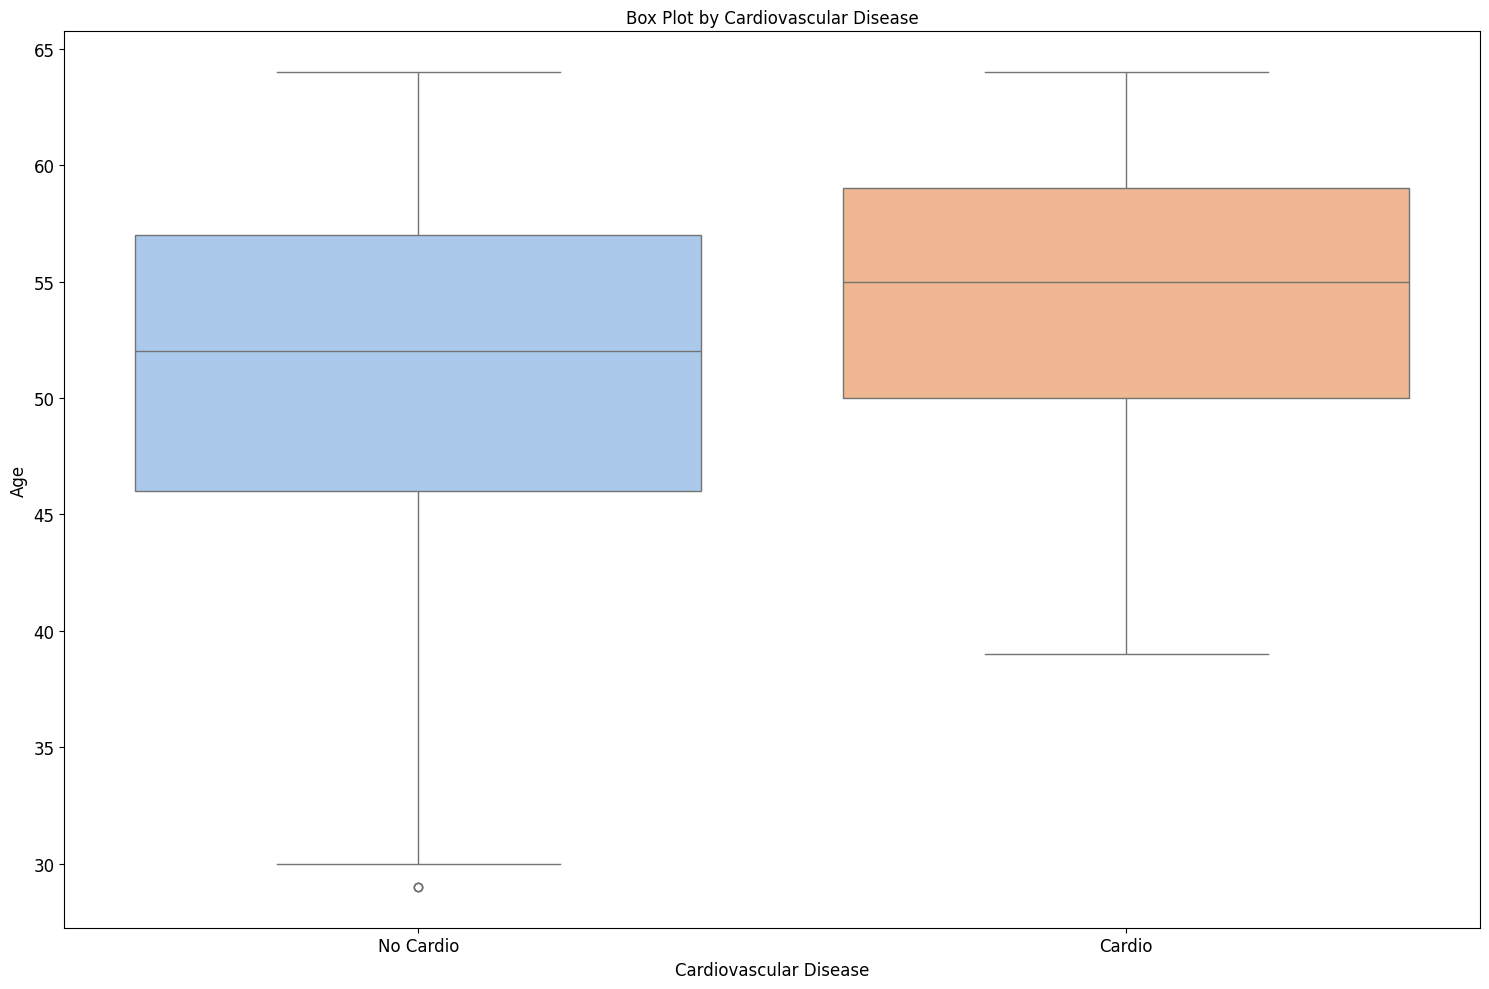

In [48]:
plt.figure(figsize=(15, 10))
plt.title('Box Plot by Cardiovascular Disease')
sns.boxplot(x='cardio', y='age', data=df, palette='pastel')
plt.xlabel('Cardiovascular Disease', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Cardio', 'Cardio'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
df['gender'].replace({'Male': 1, 'female': 2}, inplace=True)

df['cardio'].replace({'No Cardio': 0, 'With Cardio': 1}, inplace=True)

In [52]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,cholesterol_transformed,bmi,bp_ratio,blood_pressure_category,activity_category,age_weight_interaction,age_weight_interaction_normalized,pulse_pressure,mean_arterial_pressure,blood_pressure_variability
0,50,2,168,62.0,110,80,1,normal,0,0,...,normal,21.967120,1.375000,Hypertension Stage 1,Moderately Active,3100.0,0.257711,30,100.000000,21.213203
1,55,1,156,85.0,140,90,3,normal,0,0,...,well above normal,34.927679,1.555556,Hypertension Stage 2,Moderately Active,4675.0,0.414428,50,123.333333,35.355339
2,51,1,165,64.0,130,70,3,normal,0,0,...,well above normal,23.507805,1.857143,Hypertension Stage 1,Sedentary,3264.0,0.274030,60,110.000000,42.426407
3,48,2,169,82.0,150,100,1,normal,0,0,...,normal,28.710479,1.500000,Hypertension Stage 2,Moderately Active,3936.0,0.340896,50,133.333333,35.355339
4,47,1,156,56.0,100,60,1,normal,0,0,...,normal,23.011177,1.666667,Normal,Sedentary,2632.0,0.211144,40,86.666667,28.284271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,normal,1,0,...,normal,26.927438,1.500000,Hypertension Stage 1,Moderately Active,3952.0,0.342488,40,106.666667,28.284271
69996,61,1,158,126.0,140,90,2,above normal,0,0,...,above normal,50.472681,1.555556,Hypertension Stage 2,Moderately Active,7686.0,0.714030,50,123.333333,35.355339
69997,52,2,183,105.0,180,90,3,normal,0,1,...,well above normal,31.353579,2.000000,Hypertension Stage 2,Sedentary,5460.0,0.492537,90,150.000000,63.639610
69998,61,1,163,72.0,135,80,1,above normal,0,0,...,normal,27.099251,1.687500,Hypertension Stage 1,Sedentary,4392.0,0.386269,55,116.666667,38.890873


In [98]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [90]:
X_cont = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'bp_ratio', 'age_weight_interaction', 'pulse_pressure', 'mean_arterial_pressure', 'blood_pressure_variability']]  # Continuous features
X_cat = df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cholesterol_transformed', 'blood_pressure_category', 'activity_category']]  # Categorical features
y = df['cardio']

encoder = OneHotEncoder(drop='first')
X_cat_encoded = encoder.fit_transform(X_cat).toarray()

X = np.concatenate((X_cont, X_cat_encoded), axis=1)

X[np.isinf(X)] = np.nan

mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]

X = X.astype(float)
y = y.to_numpy()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

feature_names = np.concatenate((X_cont.columns, encoder.get_feature_names_out()))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_features = importance_df['Feature'].head(10).values
top_feature_indices = [list(feature_names).index(feature) for feature in top_features]

X_top = X[:, top_feature_indices]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, val_index in kf.split(X_top):
    X_train, X_val = X_top[train_index], X_top[val_index]
    y_train, y_val = y[train_index], y[val_index]


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)


    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])


    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=0)


    val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)


average_accuracy = np.mean(fold_accuracies)
print("Average Accuracy across folds:", average_accuracy)


X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

final_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

final_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

final_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.15, callbacks=[early_stopping], verbose=2)

test_loss, test_accuracy = final_model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Average Accuracy across folds: 0.7243316173553467
Epoch 1/100
1580/1580 - 5s - loss: 0.5837 - accuracy: 0.7037 - val_loss: 0.5789 - val_accuracy: 0.7171 - 5s/epoch - 3ms/step
Epoch 2/100
1580/1580 - 4s - loss: 0.5703 - accuracy: 0.7187 - val_loss: 0.5716 - val_accuracy: 0.7187 - 4s/epoch - 2ms/step
Epoch 3/100
1580/1580 - 5s - loss: 0.5685 - accuracy: 0.7197 - val_loss: 0.5742 - val_accuracy: 0.7211 - 5s/epoch - 3ms/step
Epoch 4/100
1580/1580 - 4s - loss: 0.5659 - accuracy: 0.7202 - val_loss: 0.5619 - val_accuracy: 0.7227 - 4s/epoch - 2ms/step
Epoch 5/100
1580/1580 - 4s - loss: 0.5645 - accuracy: 0.7207 - val_loss: 0.5597 - val_accuracy: 0.7211 - 4s/epoch - 2ms/step
Epoch 6/100
1580/1580 - 5s - loss: 0.5648 - accuracy: 0.7203 - val_loss: 0.5645 - val_accuracy: 0.7217 - 5s/epoch - 3ms/step
Epoch 7/100
1580/1580 - 4s - loss: 0.5637 - accuracy: 0.7224 - val_loss: 0.5608 - val_accuracy: 0.7194 - 4s/epoch - 2ms/step
Epoch 8/100
1580/1580 - 4s - loss: 0.5631 - accuracy: 0.7219 - val_loss: 0.

In [84]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

329/329 [==============================] - 3s 5ms/step - loss: 0.5401 - accuracy: 0.7347
Test Loss: 0.5400820970535278
Test Accuracy: 0.7346860766410828


In [85]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

329/329 [==============================] - 1s 1ms/step


In [86]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5180
           1       0.76      0.69      0.72      5317

    accuracy                           0.73     10497
   macro avg       0.74      0.74      0.73     10497
weighted avg       0.74      0.73      0.73     10497



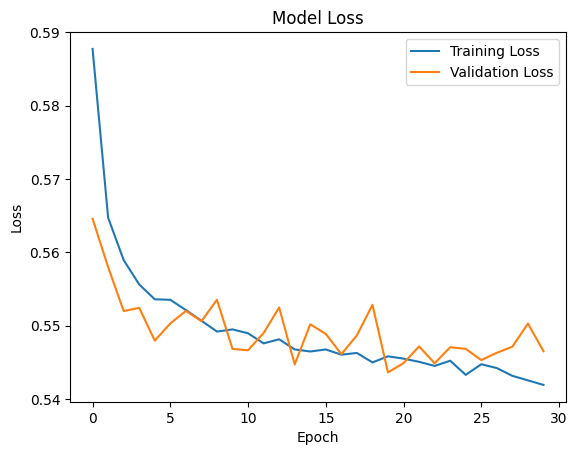

In [87]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

329/329 [==============================] - 1s 1ms/step


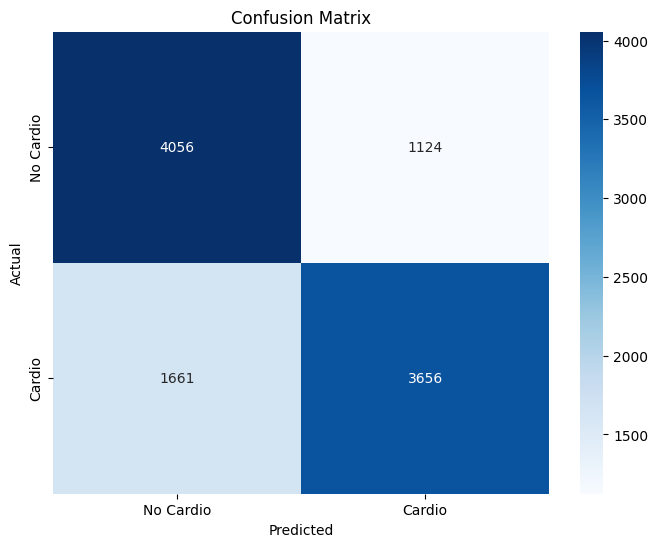

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cardio', 'Cardio'],
            yticklabels=['No Cardio', 'Cardio'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

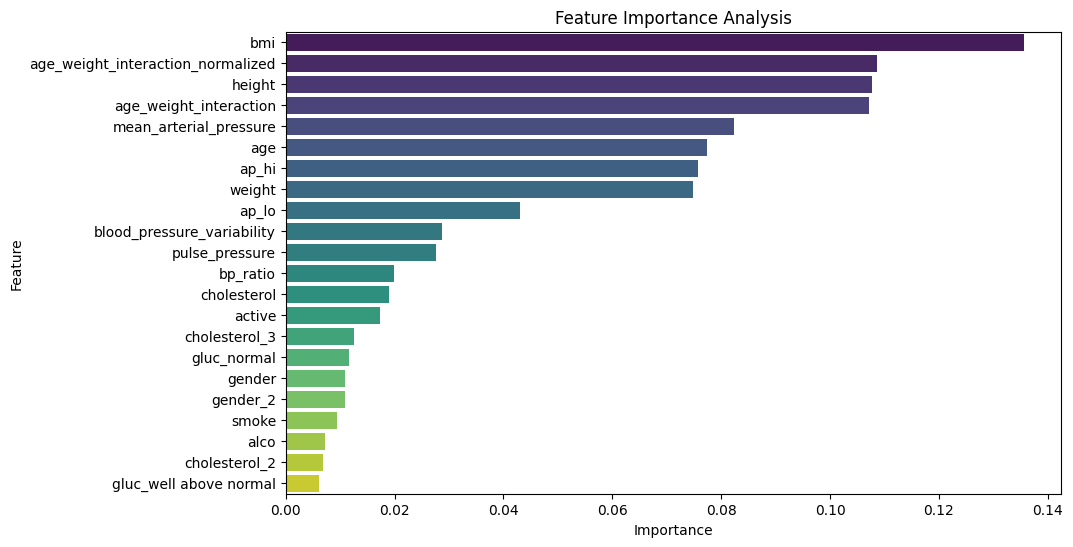

In [129]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

categorical_cols = ['gender', 'cholesterol', 'gluc']

numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_classifier)])

pipeline.fit(X, y)

feature_importances = pipeline.named_steps['classifier'].feature_importances_

encoded_categorical_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
feature_names = list(X.select_dtypes(include=['int64', 'float64']).columns) + list(encoded_categorical_cols)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()